## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 52.6ms	remaining: 52.5s
1:	learn: 0.9301086	total: 57.8ms	remaining: 28.8s
2:	learn: 0.9005637	total: 60.9ms	remaining: 20.2s
3:	learn: 0.8720983	total: 64.4ms	remaining: 16s
4:	learn: 0.8467410	total: 67.2ms	remaining: 13.4s
5:	learn: 0.8226672	total: 69.9ms	remaining: 11.6s
6:	learn: 0.7994702	total: 72.6ms	remaining: 10.3s
7:	learn: 0.7784272	total: 76.6ms	remaining: 9.49s
8:	learn: 0.7602192	total: 79.6ms	remaining: 8.77s
9:	learn: 0.7412421	total: 83.9ms	remaining: 8.31s
10:	learn: 0.7247930	total: 87.4ms	remaining: 7.86s
11:	learn: 0.7089951	total: 90.7ms	remaining: 7.47s
12:	learn: 0.6951345	total: 94.1ms	remaining: 7.14s
13:	learn: 0.6809276	total: 99.4ms	remaining: 7s
14:	learn: 0.6692630	total: 104ms	remaining: 6.83s
15:	learn: 0.6588323	total: 108ms	remaining: 6.67s
16:	learn: 0.6472700	total: 111ms	remaining: 6.43s
17:	learn: 0.6379982	total: 124ms	remaining: 6.76s
18:	learn: 0.6294674	total: 129ms	remaining: 6.68s
19

35:	learn: 0.5363592	total: 184ms	remaining: 4.91s
36:	learn: 0.5337228	total: 186ms	remaining: 4.85s
37:	learn: 0.5296892	total: 189ms	remaining: 4.79s
38:	learn: 0.5255485	total: 192ms	remaining: 4.73s
39:	learn: 0.5217941	total: 195ms	remaining: 4.68s
40:	learn: 0.5196440	total: 198ms	remaining: 4.63s
41:	learn: 0.5170220	total: 201ms	remaining: 4.59s
42:	learn: 0.5141148	total: 204ms	remaining: 4.54s
43:	learn: 0.5116444	total: 207ms	remaining: 4.5s
44:	learn: 0.5100547	total: 210ms	remaining: 4.46s
45:	learn: 0.5069096	total: 213ms	remaining: 4.41s
46:	learn: 0.5051685	total: 215ms	remaining: 4.37s
47:	learn: 0.5033968	total: 218ms	remaining: 4.32s
48:	learn: 0.5012433	total: 222ms	remaining: 4.3s
49:	learn: 0.4986132	total: 225ms	remaining: 4.27s
50:	learn: 0.4968022	total: 227ms	remaining: 4.23s
51:	learn: 0.4951632	total: 230ms	remaining: 4.2s
52:	learn: 0.4928924	total: 233ms	remaining: 4.16s
53:	learn: 0.4917272	total: 236ms	remaining: 4.13s
54:	learn: 0.4895079	total: 239ms	

100:	learn: 0.4487329	total: 374ms	remaining: 3.33s
101:	learn: 0.4481325	total: 377ms	remaining: 3.32s
102:	learn: 0.4475445	total: 380ms	remaining: 3.31s
103:	learn: 0.4466014	total: 383ms	remaining: 3.3s
104:	learn: 0.4461730	total: 386ms	remaining: 3.29s
105:	learn: 0.4457259	total: 389ms	remaining: 3.28s
106:	learn: 0.4451085	total: 392ms	remaining: 3.27s
107:	learn: 0.4447909	total: 395ms	remaining: 3.26s
108:	learn: 0.4440936	total: 398ms	remaining: 3.25s
109:	learn: 0.4435519	total: 401ms	remaining: 3.24s
110:	learn: 0.4431075	total: 403ms	remaining: 3.23s
111:	learn: 0.4425498	total: 406ms	remaining: 3.22s
112:	learn: 0.4419106	total: 409ms	remaining: 3.21s
113:	learn: 0.4414425	total: 412ms	remaining: 3.2s
114:	learn: 0.4407446	total: 415ms	remaining: 3.19s
115:	learn: 0.4402011	total: 418ms	remaining: 3.18s
116:	learn: 0.4398559	total: 420ms	remaining: 3.17s
117:	learn: 0.4392990	total: 423ms	remaining: 3.16s
118:	learn: 0.4389153	total: 426ms	remaining: 3.15s
119:	learn: 0.

166:	learn: 0.4176884	total: 565ms	remaining: 2.82s
167:	learn: 0.4173026	total: 568ms	remaining: 2.81s
168:	learn: 0.4170486	total: 571ms	remaining: 2.81s
169:	learn: 0.4165960	total: 574ms	remaining: 2.8s
170:	learn: 0.4161870	total: 577ms	remaining: 2.8s
171:	learn: 0.4156228	total: 580ms	remaining: 2.79s
172:	learn: 0.4153041	total: 583ms	remaining: 2.79s
173:	learn: 0.4148857	total: 586ms	remaining: 2.78s
174:	learn: 0.4144190	total: 589ms	remaining: 2.78s
175:	learn: 0.4140875	total: 592ms	remaining: 2.77s
176:	learn: 0.4136755	total: 595ms	remaining: 2.77s
177:	learn: 0.4133860	total: 598ms	remaining: 2.76s
178:	learn: 0.4129780	total: 601ms	remaining: 2.76s
179:	learn: 0.4122907	total: 604ms	remaining: 2.75s
180:	learn: 0.4119188	total: 607ms	remaining: 2.75s
181:	learn: 0.4115412	total: 610ms	remaining: 2.74s
182:	learn: 0.4112620	total: 613ms	remaining: 2.74s
183:	learn: 0.4107734	total: 617ms	remaining: 2.73s
184:	learn: 0.4104881	total: 620ms	remaining: 2.73s
185:	learn: 0.

227:	learn: 0.3965787	total: 761ms	remaining: 2.58s
228:	learn: 0.3963073	total: 764ms	remaining: 2.57s
229:	learn: 0.3960925	total: 767ms	remaining: 2.57s
230:	learn: 0.3957018	total: 771ms	remaining: 2.57s
231:	learn: 0.3954162	total: 774ms	remaining: 2.56s
232:	learn: 0.3951665	total: 777ms	remaining: 2.56s
233:	learn: 0.3949269	total: 779ms	remaining: 2.55s
234:	learn: 0.3945894	total: 782ms	remaining: 2.55s
235:	learn: 0.3944181	total: 785ms	remaining: 2.54s
236:	learn: 0.3941497	total: 788ms	remaining: 2.54s
237:	learn: 0.3939819	total: 792ms	remaining: 2.54s
238:	learn: 0.3938322	total: 797ms	remaining: 2.54s
239:	learn: 0.3935463	total: 801ms	remaining: 2.54s
240:	learn: 0.3933166	total: 804ms	remaining: 2.53s
241:	learn: 0.3930992	total: 806ms	remaining: 2.52s
242:	learn: 0.3928898	total: 810ms	remaining: 2.52s
243:	learn: 0.3926199	total: 812ms	remaining: 2.52s
244:	learn: 0.3923955	total: 815ms	remaining: 2.51s
245:	learn: 0.3922312	total: 819ms	remaining: 2.51s
246:	learn: 

289:	learn: 0.3817667	total: 954ms	remaining: 2.33s
290:	learn: 0.3815253	total: 957ms	remaining: 2.33s
291:	learn: 0.3813529	total: 959ms	remaining: 2.33s
292:	learn: 0.3812172	total: 962ms	remaining: 2.32s
293:	learn: 0.3809978	total: 965ms	remaining: 2.32s
294:	learn: 0.3807825	total: 968ms	remaining: 2.31s
295:	learn: 0.3805940	total: 973ms	remaining: 2.31s
296:	learn: 0.3801959	total: 976ms	remaining: 2.31s
297:	learn: 0.3799439	total: 983ms	remaining: 2.31s
298:	learn: 0.3797228	total: 986ms	remaining: 2.31s
299:	learn: 0.3795554	total: 989ms	remaining: 2.31s
300:	learn: 0.3793733	total: 1s	remaining: 2.32s
301:	learn: 0.3791607	total: 1s	remaining: 2.32s
302:	learn: 0.3789297	total: 1.01s	remaining: 2.32s
303:	learn: 0.3787482	total: 1.01s	remaining: 2.31s
304:	learn: 0.3786528	total: 1.01s	remaining: 2.31s
305:	learn: 0.3784406	total: 1.02s	remaining: 2.3s
306:	learn: 0.3782934	total: 1.02s	remaining: 2.3s
307:	learn: 0.3781631	total: 1.02s	remaining: 2.3s
308:	learn: 0.3779278

348:	learn: 0.3703798	total: 1.15s	remaining: 2.14s
349:	learn: 0.3701923	total: 1.15s	remaining: 2.13s
350:	learn: 0.3700067	total: 1.15s	remaining: 2.13s
351:	learn: 0.3698930	total: 1.16s	remaining: 2.13s
352:	learn: 0.3697314	total: 1.16s	remaining: 2.12s
353:	learn: 0.3695617	total: 1.16s	remaining: 2.12s
354:	learn: 0.3694397	total: 1.16s	remaining: 2.12s
355:	learn: 0.3692589	total: 1.17s	remaining: 2.11s
356:	learn: 0.3691107	total: 1.17s	remaining: 2.11s
357:	learn: 0.3689645	total: 1.17s	remaining: 2.1s
358:	learn: 0.3687886	total: 1.18s	remaining: 2.1s
359:	learn: 0.3686485	total: 1.18s	remaining: 2.1s
360:	learn: 0.3685749	total: 1.18s	remaining: 2.1s
361:	learn: 0.3683909	total: 1.19s	remaining: 2.09s
362:	learn: 0.3682710	total: 1.19s	remaining: 2.09s
363:	learn: 0.3681254	total: 1.19s	remaining: 2.08s
364:	learn: 0.3679761	total: 1.2s	remaining: 2.08s
365:	learn: 0.3677932	total: 1.2s	remaining: 2.08s
366:	learn: 0.3676022	total: 1.2s	remaining: 2.07s
367:	learn: 0.36741

408:	learn: 0.3609621	total: 1.34s	remaining: 1.94s
409:	learn: 0.3608193	total: 1.34s	remaining: 1.93s
410:	learn: 0.3604920	total: 1.34s	remaining: 1.93s
411:	learn: 0.3603038	total: 1.35s	remaining: 1.92s
412:	learn: 0.3602055	total: 1.35s	remaining: 1.92s
413:	learn: 0.3599094	total: 1.35s	remaining: 1.91s
414:	learn: 0.3597887	total: 1.35s	remaining: 1.91s
415:	learn: 0.3595791	total: 1.36s	remaining: 1.91s
416:	learn: 0.3594487	total: 1.36s	remaining: 1.9s
417:	learn: 0.3592759	total: 1.36s	remaining: 1.9s
418:	learn: 0.3591088	total: 1.37s	remaining: 1.9s
419:	learn: 0.3589470	total: 1.37s	remaining: 1.89s
420:	learn: 0.3587972	total: 1.37s	remaining: 1.89s
421:	learn: 0.3586831	total: 1.38s	remaining: 1.88s
422:	learn: 0.3585620	total: 1.38s	remaining: 1.88s
423:	learn: 0.3584427	total: 1.38s	remaining: 1.88s
424:	learn: 0.3583044	total: 1.38s	remaining: 1.87s
425:	learn: 0.3581698	total: 1.39s	remaining: 1.87s
426:	learn: 0.3580461	total: 1.39s	remaining: 1.86s
427:	learn: 0.3

474:	learn: 0.3513843	total: 1.53s	remaining: 1.69s
475:	learn: 0.3512406	total: 1.53s	remaining: 1.69s
476:	learn: 0.3510044	total: 1.54s	remaining: 1.68s
477:	learn: 0.3509121	total: 1.54s	remaining: 1.68s
478:	learn: 0.3507270	total: 1.54s	remaining: 1.68s
479:	learn: 0.3506003	total: 1.54s	remaining: 1.67s
480:	learn: 0.3505111	total: 1.55s	remaining: 1.67s
481:	learn: 0.3503906	total: 1.55s	remaining: 1.67s
482:	learn: 0.3501522	total: 1.55s	remaining: 1.66s
483:	learn: 0.3500494	total: 1.56s	remaining: 1.66s
484:	learn: 0.3498921	total: 1.56s	remaining: 1.66s
485:	learn: 0.3497143	total: 1.57s	remaining: 1.66s
486:	learn: 0.3496172	total: 1.57s	remaining: 1.66s
487:	learn: 0.3494609	total: 1.58s	remaining: 1.65s
488:	learn: 0.3493200	total: 1.58s	remaining: 1.65s
489:	learn: 0.3491550	total: 1.58s	remaining: 1.65s
490:	learn: 0.3490323	total: 1.58s	remaining: 1.64s
491:	learn: 0.3488767	total: 1.59s	remaining: 1.64s
492:	learn: 0.3487285	total: 1.59s	remaining: 1.64s
493:	learn: 

539:	learn: 0.3428024	total: 1.72s	remaining: 1.47s
540:	learn: 0.3426641	total: 1.73s	remaining: 1.46s
541:	learn: 0.3425885	total: 1.73s	remaining: 1.46s
542:	learn: 0.3424695	total: 1.73s	remaining: 1.46s
543:	learn: 0.3423997	total: 1.73s	remaining: 1.45s
544:	learn: 0.3422315	total: 1.74s	remaining: 1.45s
545:	learn: 0.3421242	total: 1.74s	remaining: 1.45s
546:	learn: 0.3419673	total: 1.74s	remaining: 1.44s
547:	learn: 0.3418121	total: 1.75s	remaining: 1.44s
548:	learn: 0.3416228	total: 1.75s	remaining: 1.44s
549:	learn: 0.3414331	total: 1.75s	remaining: 1.43s
550:	learn: 0.3413090	total: 1.75s	remaining: 1.43s
551:	learn: 0.3411591	total: 1.76s	remaining: 1.43s
552:	learn: 0.3410901	total: 1.76s	remaining: 1.42s
553:	learn: 0.3409923	total: 1.76s	remaining: 1.42s
554:	learn: 0.3408730	total: 1.76s	remaining: 1.42s
555:	learn: 0.3408310	total: 1.77s	remaining: 1.41s
556:	learn: 0.3407365	total: 1.77s	remaining: 1.41s
557:	learn: 0.3406506	total: 1.77s	remaining: 1.41s
558:	learn: 

601:	learn: 0.3361892	total: 1.91s	remaining: 1.26s
602:	learn: 0.3360683	total: 1.91s	remaining: 1.26s
603:	learn: 0.3359807	total: 1.92s	remaining: 1.26s
604:	learn: 0.3359096	total: 1.92s	remaining: 1.25s
605:	learn: 0.3358268	total: 1.92s	remaining: 1.25s
606:	learn: 0.3356597	total: 1.93s	remaining: 1.25s
607:	learn: 0.3355448	total: 1.93s	remaining: 1.24s
608:	learn: 0.3354512	total: 1.93s	remaining: 1.24s
609:	learn: 0.3353398	total: 1.94s	remaining: 1.24s
610:	learn: 0.3352669	total: 1.94s	remaining: 1.23s
611:	learn: 0.3351716	total: 1.94s	remaining: 1.23s
612:	learn: 0.3351155	total: 1.95s	remaining: 1.23s
613:	learn: 0.3350041	total: 1.95s	remaining: 1.23s
614:	learn: 0.3349098	total: 1.95s	remaining: 1.22s
615:	learn: 0.3348304	total: 1.96s	remaining: 1.22s
616:	learn: 0.3347009	total: 1.96s	remaining: 1.22s
617:	learn: 0.3346458	total: 1.96s	remaining: 1.21s
618:	learn: 0.3345381	total: 1.96s	remaining: 1.21s
619:	learn: 0.3344101	total: 1.97s	remaining: 1.21s
620:	learn: 

661:	learn: 0.3299994	total: 2.1s	remaining: 1.07s
662:	learn: 0.3299184	total: 2.1s	remaining: 1.07s
663:	learn: 0.3298189	total: 2.11s	remaining: 1.07s
664:	learn: 0.3296970	total: 2.11s	remaining: 1.06s
665:	learn: 0.3296671	total: 2.11s	remaining: 1.06s
666:	learn: 0.3295999	total: 2.12s	remaining: 1.06s
667:	learn: 0.3295390	total: 2.12s	remaining: 1.05s
668:	learn: 0.3294195	total: 2.12s	remaining: 1.05s
669:	learn: 0.3293185	total: 2.13s	remaining: 1.05s
670:	learn: 0.3292086	total: 2.13s	remaining: 1.04s
671:	learn: 0.3289913	total: 2.13s	remaining: 1.04s
672:	learn: 0.3288859	total: 2.14s	remaining: 1.04s
673:	learn: 0.3288145	total: 2.14s	remaining: 1.03s
674:	learn: 0.3286969	total: 2.14s	remaining: 1.03s
675:	learn: 0.3286108	total: 2.15s	remaining: 1.03s
676:	learn: 0.3285218	total: 2.15s	remaining: 1.02s
677:	learn: 0.3284620	total: 2.15s	remaining: 1.02s
678:	learn: 0.3283999	total: 2.15s	remaining: 1.02s
679:	learn: 0.3283506	total: 2.16s	remaining: 1.01s
680:	learn: 0.

709:	learn: 0.3255982	total: 2.26s	remaining: 922ms
710:	learn: 0.3255301	total: 2.27s	remaining: 922ms
711:	learn: 0.3254442	total: 2.27s	remaining: 919ms
712:	learn: 0.3253361	total: 2.27s	remaining: 916ms
713:	learn: 0.3252431	total: 2.28s	remaining: 912ms
714:	learn: 0.3251186	total: 2.28s	remaining: 909ms
715:	learn: 0.3250323	total: 2.28s	remaining: 906ms
716:	learn: 0.3249511	total: 2.29s	remaining: 902ms
717:	learn: 0.3248372	total: 2.29s	remaining: 899ms
718:	learn: 0.3247371	total: 2.29s	remaining: 896ms
719:	learn: 0.3246676	total: 2.29s	remaining: 893ms
720:	learn: 0.3245862	total: 2.3s	remaining: 889ms
721:	learn: 0.3245270	total: 2.3s	remaining: 886ms
722:	learn: 0.3244558	total: 2.3s	remaining: 883ms
723:	learn: 0.3243835	total: 2.31s	remaining: 879ms
724:	learn: 0.3242957	total: 2.31s	remaining: 876ms
725:	learn: 0.3242628	total: 2.31s	remaining: 873ms
726:	learn: 0.3242076	total: 2.31s	remaining: 869ms
727:	learn: 0.3240923	total: 2.32s	remaining: 866ms
728:	learn: 0.3

770:	learn: 0.3202066	total: 2.45s	remaining: 727ms
771:	learn: 0.3200935	total: 2.45s	remaining: 724ms
772:	learn: 0.3200251	total: 2.45s	remaining: 721ms
773:	learn: 0.3199577	total: 2.46s	remaining: 717ms
774:	learn: 0.3198837	total: 2.46s	remaining: 714ms
775:	learn: 0.3198135	total: 2.46s	remaining: 711ms
776:	learn: 0.3197430	total: 2.46s	remaining: 707ms
777:	learn: 0.3196478	total: 2.47s	remaining: 704ms
778:	learn: 0.3194714	total: 2.47s	remaining: 701ms
779:	learn: 0.3194042	total: 2.47s	remaining: 698ms
780:	learn: 0.3193209	total: 2.48s	remaining: 694ms
781:	learn: 0.3192009	total: 2.48s	remaining: 691ms
782:	learn: 0.3191109	total: 2.48s	remaining: 688ms
783:	learn: 0.3190255	total: 2.48s	remaining: 685ms
784:	learn: 0.3189403	total: 2.49s	remaining: 681ms
785:	learn: 0.3188715	total: 2.49s	remaining: 678ms
786:	learn: 0.3188016	total: 2.49s	remaining: 675ms
787:	learn: 0.3187670	total: 2.5s	remaining: 672ms
788:	learn: 0.3186601	total: 2.5s	remaining: 668ms
789:	learn: 0.

833:	learn: 0.3149588	total: 2.64s	remaining: 526ms
834:	learn: 0.3149074	total: 2.64s	remaining: 523ms
835:	learn: 0.3148291	total: 2.65s	remaining: 519ms
836:	learn: 0.3147707	total: 2.65s	remaining: 516ms
837:	learn: 0.3147022	total: 2.65s	remaining: 513ms
838:	learn: 0.3145737	total: 2.65s	remaining: 510ms
839:	learn: 0.3144908	total: 2.66s	remaining: 506ms
840:	learn: 0.3144038	total: 2.66s	remaining: 503ms
841:	learn: 0.3143434	total: 2.66s	remaining: 500ms
842:	learn: 0.3142662	total: 2.67s	remaining: 497ms
843:	learn: 0.3141532	total: 2.67s	remaining: 493ms
844:	learn: 0.3140919	total: 2.67s	remaining: 490ms
845:	learn: 0.3140384	total: 2.67s	remaining: 487ms
846:	learn: 0.3139822	total: 2.68s	remaining: 484ms
847:	learn: 0.3138839	total: 2.68s	remaining: 480ms
848:	learn: 0.3138291	total: 2.68s	remaining: 477ms
849:	learn: 0.3137772	total: 2.69s	remaining: 474ms
850:	learn: 0.3137138	total: 2.69s	remaining: 471ms
851:	learn: 0.3136859	total: 2.69s	remaining: 467ms
852:	learn: 

900:	learn: 0.3100138	total: 2.83s	remaining: 311ms
901:	learn: 0.3099635	total: 2.83s	remaining: 308ms
902:	learn: 0.3098989	total: 2.84s	remaining: 305ms
903:	learn: 0.3098084	total: 2.84s	remaining: 302ms
904:	learn: 0.3097402	total: 2.84s	remaining: 299ms
905:	learn: 0.3096378	total: 2.85s	remaining: 295ms
906:	learn: 0.3095878	total: 2.85s	remaining: 292ms
907:	learn: 0.3095154	total: 2.85s	remaining: 289ms
908:	learn: 0.3094688	total: 2.85s	remaining: 286ms
909:	learn: 0.3093784	total: 2.86s	remaining: 283ms
910:	learn: 0.3093058	total: 2.86s	remaining: 279ms
911:	learn: 0.3092574	total: 2.86s	remaining: 276ms
912:	learn: 0.3092023	total: 2.87s	remaining: 273ms
913:	learn: 0.3091306	total: 2.87s	remaining: 270ms
914:	learn: 0.3090719	total: 2.87s	remaining: 267ms
915:	learn: 0.3090199	total: 2.87s	remaining: 264ms
916:	learn: 0.3089417	total: 2.88s	remaining: 260ms
917:	learn: 0.3088562	total: 2.88s	remaining: 257ms
918:	learn: 0.3087578	total: 2.88s	remaining: 254ms
919:	learn: 

968:	learn: 0.3049470	total: 3.02s	remaining: 96.7ms
969:	learn: 0.3049028	total: 3.02s	remaining: 93.5ms
970:	learn: 0.3048446	total: 3.03s	remaining: 90.4ms
971:	learn: 0.3047712	total: 3.03s	remaining: 87.3ms
972:	learn: 0.3047313	total: 3.03s	remaining: 84.2ms
973:	learn: 0.3046600	total: 3.04s	remaining: 81ms
974:	learn: 0.3045983	total: 3.04s	remaining: 77.9ms
975:	learn: 0.3044944	total: 3.04s	remaining: 74.8ms
976:	learn: 0.3044431	total: 3.04s	remaining: 71.7ms
977:	learn: 0.3043959	total: 3.05s	remaining: 68.6ms
978:	learn: 0.3043249	total: 3.05s	remaining: 65.5ms
979:	learn: 0.3042644	total: 3.05s	remaining: 62.3ms
980:	learn: 0.3042142	total: 3.06s	remaining: 59.2ms
981:	learn: 0.3041509	total: 3.06s	remaining: 56.1ms
982:	learn: 0.3041077	total: 3.06s	remaining: 53ms
983:	learn: 0.3040665	total: 3.06s	remaining: 49.8ms
984:	learn: 0.3040237	total: 3.07s	remaining: 46.7ms
985:	learn: 0.3039532	total: 3.07s	remaining: 43.6ms
986:	learn: 0.3038723	total: 3.07s	remaining: 40.5

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
27366038.830540404


#### Sanity Checks 

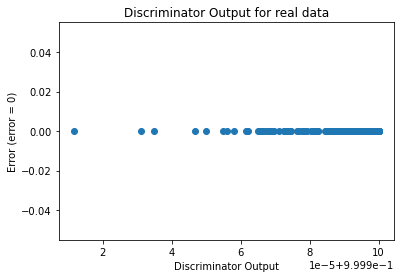

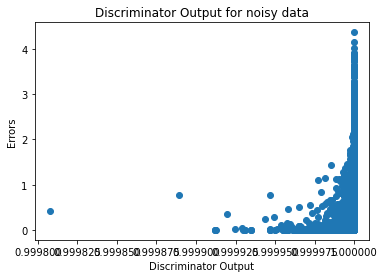

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)